In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal.length','sepal.width','petal.length','petal.width','Class']

df = pd.read_csv(url,names=cls)

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal.length','sepal.width','petal.length','petal.width']

x=df.loc[:,features].values
y=df.loc[:,['Class']].values

In [5]:
 x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pcomp = pca.fit_transform(x)

In [9]:
pdf = pd.DataFrame(data=pcomp,columns=['Principal Component 1','Principal Component 2'])


In [10]:
finaldf=pd.concat([pdf,df['Class']],axis=1)
finaldf.head()

,Principal Component 1,Principal Component 2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


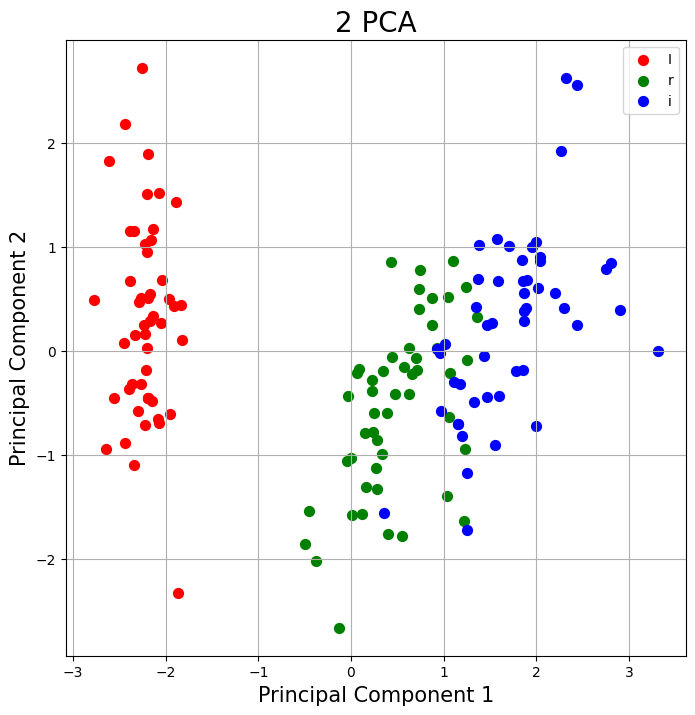

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1",fontsize=15)
ax.set_ylabel("Principal Component 2",fontsize=15)
ax.set_title("2 PCA",fontsize=20)

variety = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']

for variety,color in zip(variety,colors):
    idtok = finaldf['Class']==variety
    ax.scatter(finaldf.loc[idtok,'Principal Component 1'],finaldf.loc[idtok,'Principal Component 2'],c=color,s=50)
    
ax.legend(variety)
ax.grid()